## iimports

In [4]:
#!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


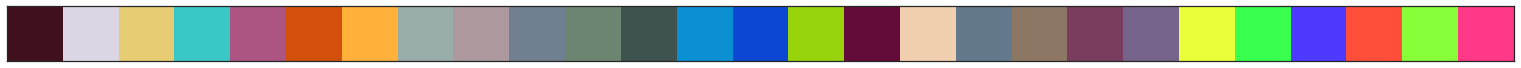

In [5]:
from __future__ import print_function
import matplotlib
import matplotlib.dates as mdates
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sys, os
import io
from typing import Dict, Pattern

import seaborn as sns; sns.set()  # for plot styling
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
PALLET = ['#40111D', '#DCD5E4', '#E7CC74'
                 ,'#39C8C6', '#AC5583', '#D3500C'
                 ,'#FFB139', '#98ADA7', '#AD989E'
                 ,'#708090','#6C8570','#3E534D'

                 ,'#0B8FD3','#0B47D3','#96D30B'                 
                 ,'#630C3A','#F1D0AF','#64788B'                 
                 ,'#8B7764','#7A3C5D','#77648B'
                 ,'#eaff39','#39ff4e','#4e39ff'
                 ,'#ff4e39','#87ff39','#ff3987', ]
N_PALLET = len(PALLET)
sns.set_palette(PALLET)
sns.palplot(PALLET)

In [6]:
%load_ext autoreload
%autoreload 2

#npackages=len(packages.split('\n'))
#type(packages)
#npackages, '\n', packages[0]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# add if you want to add google driveAssertionError
old__file__ = !pwd
__file__ =  old__file__  #!cd ../../NLP ;pwd
#__file__ = !pwd
__file__ = '/gdrive/My Drive'

sys.path.append(__file__)
print(sys.path)
os.chdir(old__file__[0])
!pwd
__file__

['/Users/brucecottman/Documents/PROJECTS/FinMrkt/src', '/usr/local/Cellar/apache-spark/2.0.1/libexec/python', '/Users/brucecottman/Documents/PROJECTS/FinMrkt/src/$', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python37.zip', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload', '', '/Users/brucecottman/Library/Python/3.7/lib/python/site-packages', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/extensions', '/Users/brucecottman/.ipython', '/gdrive/My Drive', '/gdrive/My Drive']
/Users/brucecottman/Documents/PROJECTS/FinMrkt/src


'/gdrive/My Drive'

## Read

In [8]:
NDXT_wk = pd.read_csv('../data/NDXT.csv', index_col=0, parse_dates=True)
NDXT_wk.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-02-20,1000.859985,1018.809998,996.919983,1012.070007,1012.070007,0
2006-02-27,1013.609985,1050.400024,1006.909973,1036.260010,1036.260010,0
2006-03-06,1039.209961,1040.770020,994.809998,1003.140015,1003.140015,0
2006-03-13,1007.250000,1039.099976,1002.830017,1024.939941,1024.939941,0
2006-03-20,1027.849976,1042.859985,1014.190002,1033.770020,1033.770020,0


In [9]:
NDXT_wk.index

DatetimeIndex(['2006-02-20', '2006-02-27', '2006-03-06', '2006-03-13',
               '2006-03-20', '2006-03-27', '2006-04-03', '2006-04-10',
               '2006-04-17', '2006-04-24',
               ...
               '2022-02-07', '2022-02-14', '2022-02-21', '2022-02-28',
               '2022-03-07', '2022-03-14', '2022-03-21', '2022-03-28',
               '2022-04-04', '2022-04-11'],
              dtype='datetime64[ns]', name='Date', length=843, freq=None)

In [10]:
NDXT_wk.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

<AxesSubplot:xlabel='Date'>

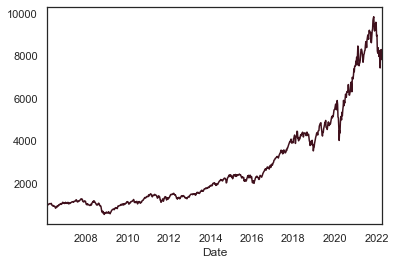

In [11]:
NDXT_wk['Adj Close'].plot.line()

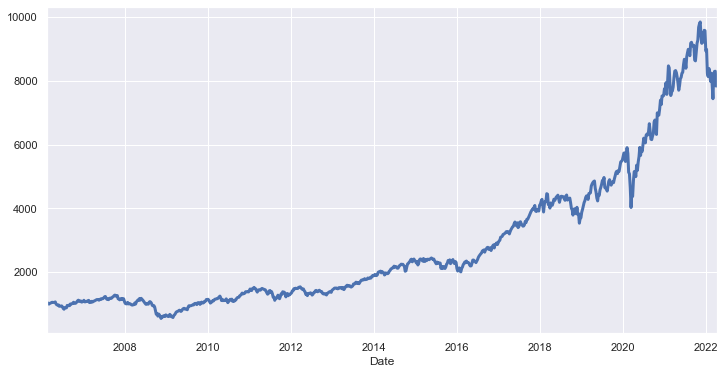

In [12]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(12, 6)})
NDXT_wk['Adj Close'].plot(linewidth=3.0);
plt.show()

## define future value function

In [13]:
def FV(principle=0, deposit=0, withdrawal=0, fyield=0, nperiod=1):
    if ((principle + deposit+ withdrawal) == 0): return(0) 
    if (fyield <= 0): return (principle + deposit+ withdrawal) #default is end of period
    amount = (deposit- withdrawal)
    cumamount =  0
    for n in range(1,nperiod+1):
#        print( 'before cumamount',cumamount)
        cumamount = cumamount + deposit*(1+fyield)**n
#        print( 'after cumamount',cumamount)
    return(principle*(1+fyield**nperiod) + cumamount)


In [14]:
principle=1
deposit = 100
withdrawal=0

fyield=0.1
nperiodl=range(1,11)
for nperiod in nperiodl:
    print('nperiod', nperiod)
    print('fv = ', FV(principle, deposit,withdrawal,fyield, nperiod))

nperiod 1
fv =  111.10000000000001
nperiod 2
fv =  232.01000000000002
nperiod 3
fv =  365.10100000000006
nperiod 4
fv =  511.5101000000001
nperiod 5
fv =  672.5610100000001
nperiod 6
fv =  849.7171010000003
nperiod 7
fv =  1044.5888101000005
nperiod 8
fv =  1258.9476910100004
nperiod 9
fv =  1494.7424601010007
nperiod 10
fv =  1754.116706110101


In [15]:
def yieldfit(nperiod: int=1, principle: float =0.0, fyield: float=0.0)-> float:
    if ((principle) == 0): return(0) 
    if (fyield <= 0): return (principle) #default is end of period
    return(principle*(1+fyield)**nperiod)

In [16]:
principle = 100
fyield=0.1
nperiodl=range(1,11)
for nperiod in nperiodl:
    print('nperiod', nperiod)
    print('fv = ', yieldfit(nperiod,principle,fyield))



nperiod 1
fv =  110.00000000000001
nperiod 2
fv =  121.00000000000001
nperiod 3
fv =  133.10000000000005
nperiod 4
fv =  146.41000000000005
nperiod 5
fv =  161.05100000000004
nperiod 6
fv =  177.1561000000001
nperiod 7
fv =  194.87171000000012
nperiod 8
fv =  214.35888100000017
nperiod 9
fv =  235.7947691000002
nperiod 10
fv =  259.3742460100002


## fit

In [17]:
from scipy.optimize import curve_fit

nper = NDXT_wk.index.size
xdata = np.linspace(1,nper,num=nper).astype(int)
NDXT_wk['ID'] = xdata
y_data = NDXT_wk['Adj Close'].to_numpy()
NDXT_wk.head(20)

,Open,High,Low,Close,Adj Close,Volume,ID
Date,,,,,,,
2006-02-20,1000.859985,1018.809998,996.919983,1012.070007,1012.070007,0,1
2006-02-27,1013.609985,1050.400024,1006.909973,1036.260010,1036.260010,0,2
2006-03-06,1039.209961,1040.770020,994.809998,1003.140015,1003.140015,0,3
2006-03-13,1007.250000,1039.099976,1002.830017,1024.939941,1024.939941,0,4
2006-03-20,1027.849976,1042.859985,1014.190002,1033.770020,1033.770020,0,5
2006-03-27,1032.770020,1058.689941,1025.030029,1048.800049,1048.800049,0,6
2006-04-03,1054.310059,1078.709961,1046.979980,1061.550049,1061.550049,0,7
2006-04-10,1061.280029,1065.030029,1041.689941,1055.760010,1055.760010,0,8
2006-04-17,1053.199951,1084.619995,1035.400024,1055.050049,1055.050049,0,9


In [18]:
from scipy.optimize import curve_fit
df = NDXT_wk
column_name =  'Adj Close'
nppy = 52
low_bounds = [1000,.05/nppy]
high_bounds = [1300, .5/nppy]
nper = NDXT_wk.index.size
xdata = np.linspace(1,nper,num=nper).astype(int)
NDXT_wk['ID'] = xdata
y_data = NDXT_wk['Adj Close'].to_numpy()

popt, pcov = curve_fit(yieldfit, xdata, y_data, method='trf', 
                       bounds=(low_bounds, high_bounds))
stderr=np.sqrt(np.diag(pcov))
popt[0],stderr[0],popt[1]*nppy, stderr[1]*nppy

(1000.0000000000002,
 29.30769678335937,
 0.12388506263288757,
 0.0022724465413511944)

In [19]:
popt,stderr,popt-stderr


(array([1.00000000e+03, 2.38240505e-03]),
 array([2.93076968e+01, 4.37008950e-05]),
 array([9.70692303e+02, 2.33870416e-03]))

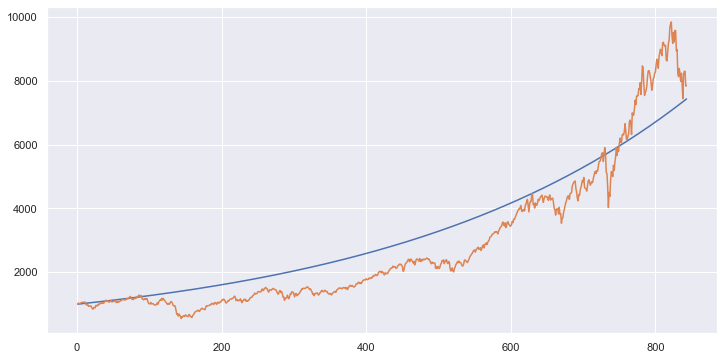

In [20]:
sns.set(rc={'figure.figsize':(12, 6)})
plt.plot(xdata, yieldfit(xdata, *popt))
plt.plot(xdata, y_data)


plt.show()

<AxesSubplot:xlabel='ID', ylabel='Adj Close'>

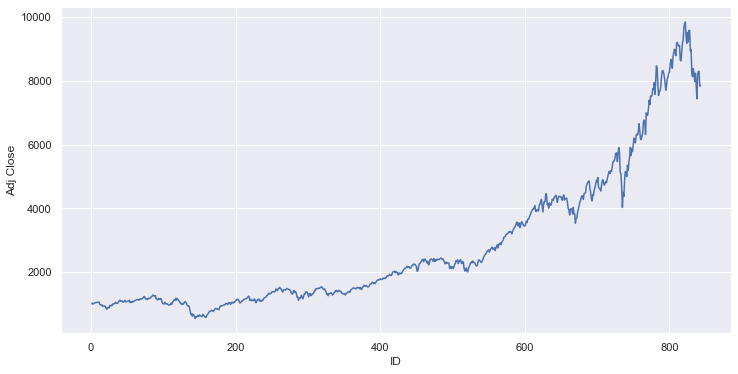

In [21]:
sns.lineplot(data=NDXT_wk, x="ID", y="Adj Close", ci='sd')

In [22]:
def peb(df, column_name, nppy, low_bounds, high_bounds,nstd):
    # nppy: number of periods per year
    # low_bounds: [low_priniple, low_yield ]
    # high_bounds: [high_priniple, high_yield ]
    #nstd: number of standard deviation = 2*width of error banner

    xddata = df.index  #dates array for axis
    nper = df.index.size # number of periods
    xdata = np.linspace(1,nper,num=nper).astype(int)
    df['ID'] = xdata
    y_data = df[column_name].to_numpy()

             
    # Compute upper and lower bounds using chosen uncertainty measure: here
    # it is a fraction of the standard deviation of measurements at each
    # time point based on the unbiased sample variance
    popt, pcov = curve_fit(yieldfit, xdata, y_data, method='trf', 
                           bounds=(low_bounds, high_bounds))
    # determine std of errors
    stderr=np.sqrt(np.diag(pcov))
    yfit_data= yieldfit(xdata, *popt)
    # trend line, high error, low error
    df['y_fit'] = yfit_data
    yfit_data_low =  yieldfit(xdata, *(popt-stderr*nstd))
    df['y_fit_low'] = yfit_data_low
    yfit_data_high = yieldfit(xdata, *(popt+stderr*nstd))
    df['y_fit_high'] = yfit_data_high


    sns.set(rc={'figure.figsize':(12, 6)})
    fig, ax = plt.subplots(figsize=(12,6))
    fig.autofmt_xdate(rotation=45)
    #
    ntm = 19
    interv = nper//ntm  # interval between 25 tick marks
    if interv < 1: interv = 1
        # weekly instead of yearly x axis labels
    if (nppy == 52): 
        ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=interv))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
#    monthly instead of yearly x axis labels
    elif (nppy == 12): 
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=interv))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
    # We change the fontsize of minor ticks label 
    
    
    ax.tick_params(axis='both', which='major', labelsize=14)
    # plot raw data
    ax.plot(xddata, y_data, color='black', label='yield')
    # plot fitted yield trend line
    ax.plot(xddata, yfit_data, color='tab:blue', label='yield fit')
    # plot fitted yield lowabs error trend line
    ax.plot(xddata, yfit_data_low, color='tab:blue', alpha=0.1)
    # plot fitted yield high error trend line
    ax.plot(xddata, yfit_data_high, color='tab:blue', alpha=0.1)
    # plot error band
    ax.fill_between(xddata, yfit_data_low, yfit_data_high, alpha=0.2)
    ax.set_ylabel('price($)',size=20)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ###  Annotate
    astr = "PRINCIPAL= {:.2f} ($)\nYIELD= {:.2%}/year".format(popt[0], popt[1]*nppy) 
    ax.annotate(
        astr,
        xy=(0.5, 0.7), xycoords=ax.transAxes,
        xytext=(-60, 30), textcoords='offset points',
        size=20,
        bbox=dict(boxstyle="round4,pad=.5", fc="0.8"),)

    plt.show()


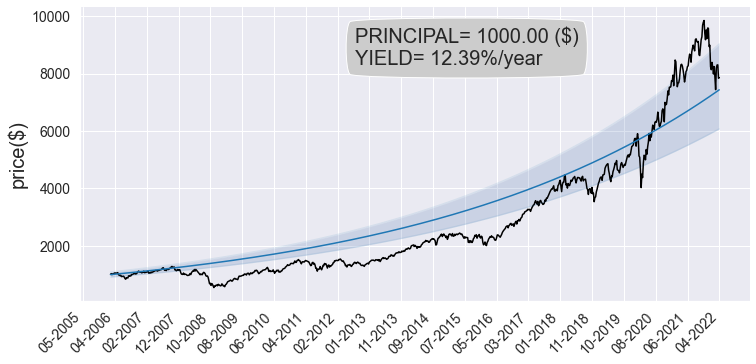

In [23]:
df = NDXT_wk
column_name =  'Adj Close'
nppy = 52
low_bounds = [1000,.05/nppy]
high_bounds = [1500, .5/nppy]
nstd = 3
peb(df, column_name, nppy, low_bounds, high_bounds, nstd)

# alternate load data

In [24]:
!pip install pandas_datareader #if not already installed 

  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 21.0 MB/s eta 0:00:0000:0100:01


In [27]:
## Alternate data reader
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 21.0 MB/s eta 0:00:0000:0100:01


In [29]:
from pandas_datareader.data import DataReader

import copy

import plotly.express as px


# start_date = '1971/02/05' 
# end_date = '2022/4/21'

In [30]:
start_date = '1971/02/05' 
end_date = '2022/4/21'
tickers = '^IXIC'
EFT_df = DataReader(tickers, 'yahoo', start = start_date, end = end_date)
EFT_df.index = pd.to_datetime(EFT_df.index, format ='%Y-%m-%d')
EFT_df.columns,EFT_df.head(),EFT_df.tail(),EFT_df.size

(Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object'),
                   High         Low        Open       Close  Volume   Adj Close
 Date                                                                          
 1971-02-05  100.000000  100.000000  100.000000  100.000000       0  100.000000
 1971-02-08  100.839996  100.839996  100.839996  100.839996       0  100.839996
 1971-02-09  100.760002  100.760002  100.760002  100.760002       0  100.760002
 1971-02-10  100.690002  100.690002  100.690002  100.690002       0  100.690002
 1971-02-11  101.449997  101.449997  101.449997  101.449997       0  101.449997,
                     High           Low          Open         Close  \
 Date                                                                 
 2022-04-14  13662.929688  13345.219727  13647.429688  13351.080078   
 2022-04-18  13414.269531  13222.030273  13319.389648  13332.360352   
 2022-04-19  13643.969727  13281.219727  13312.440430  13619.660156   
 20

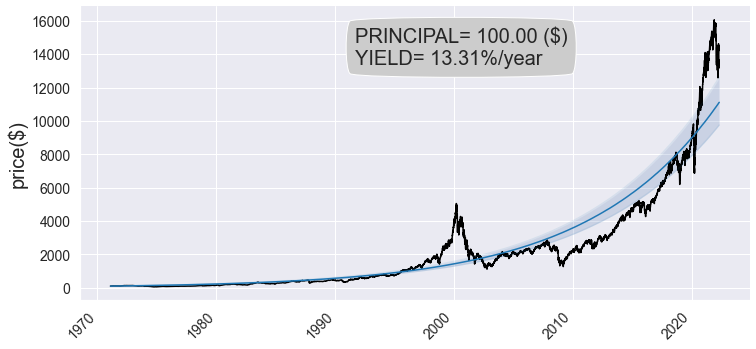

In [31]:
df = EFT_df
column_name =  'Adj Close'
nppy = 365
low_bounds = [100,.05/nppy]
high_bounds = [110, .35/nppy]
nstd = 3
peb(df, column_name, nppy, low_bounds, high_bounds, nstd)

# IXIC period variation

### start_date = '1971/02/05' a
### end_date = '2010/4/21'

In [32]:
start_date = '1971/02/05' 
end_date = '2010/4/21'
tickers = '^IXIC'
EFT_df = DataReader(tickers, 'yahoo', start = start_date, end = end_date)
EFT_df.index = pd.to_datetime(EFT_df.index, format ='%Y-%m-%d')
EFT_df.columns,EFT_df.head(),EFT_df.tail(),EFT_df.size

(Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object'),
                   High         Low        Open       Close  Volume   Adj Close
 Date                                                                          
 1971-02-05  100.000000  100.000000  100.000000  100.000000       0  100.000000
 1971-02-08  100.839996  100.839996  100.839996  100.839996       0  100.839996
 1971-02-09  100.760002  100.760002  100.760002  100.760002       0  100.760002
 1971-02-10  100.690002  100.690002  100.690002  100.690002       0  100.690002
 1971-02-11  101.449997  101.449997  101.449997  101.449997       0  101.449997,
                    High          Low         Open        Close      Volume  \
 Date                                                                         
 2010-04-15  2517.820068  2502.510010  2503.409912  2515.689941  2840660000   
 2010-04-16  2510.060059  2467.679932  2505.379883  2481.260010  2960950000   
 2010-04-19  2487.669922  2451.719971  247

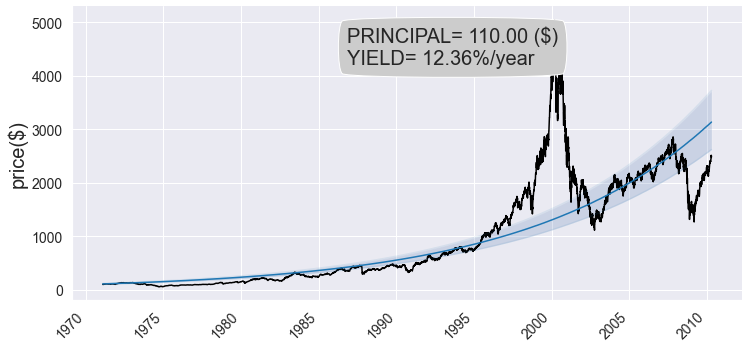

In [33]:
df = EFT_df
column_name =  'Adj Close'
nppy = 365
low_bounds = [100,.05/nppy]
high_bounds = [110, .35/nppy]
nstd = 3
peb(df, column_name, nppy, low_bounds, high_bounds, nstd)

In [34]:
start_date = '2004/01/01' 
end_date = '2022/4/21'
tickers = '^IXIC'
EFT_df = DataReader(tickers, 'yahoo', start = start_date, end = end_date)
EFT_df.index = pd.to_datetime(EFT_df.index, format ='%Y-%m-%d')
EFT_df.columns,EFT_df.head(),EFT_df.tail(),EFT_df.size

(Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object'),
                    High          Low         Open        Close      Volume  \
 Date                                                                         
 2004-01-02  2022.369995  1999.770020  2011.079956  2006.680054  1666780000   
 2004-01-05  2047.359985  2020.780029  2020.780029  2047.359985  2362910000   
 2004-01-06  2061.540039  2039.630005  2044.550049  2057.370117  2273220000   
 2004-01-07  2078.090088  2047.020020  2056.750000  2077.679932  2294280000   
 2004-01-08  2100.250000  2078.050049  2089.600098  2100.250000  2683950000   
 
               Adj Close  
 Date                     
 2004-01-02  2006.680054  
 2004-01-05  2047.359985  
 2004-01-06  2057.370117  
 2004-01-07  2077.679932  
 2004-01-08  2100.250000  ,
                     High           Low          Open         Close  \
 Date                                                                 
 2022-04-14  13662.929688  13345

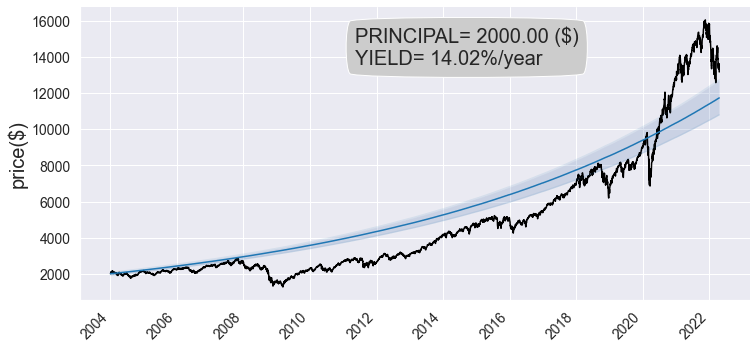

In [35]:
df = EFT_df
column_name =  'Adj Close'
nppy = 365
low_bounds = [2000,.05/nppy]
high_bounds = [2110, .35/nppy]
nstd = 3
peb(df, column_name, nppy, low_bounds, high_bounds, nstd)

In [36]:
start_date = '2012/01/01' 
end_date = '2022/4/21'
tickers = '^IXIC'
EFT_df = DataReader(tickers, 'yahoo', start = start_date, end = end_date)
EFT_df.index = pd.to_datetime(EFT_df.index, format ='%Y-%m-%d')
EFT_df.columns,EFT_df.head(),EFT_df.tail(),EFT_df.size

(Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object'),
                    High          Low         Open        Close      Volume  \
 Date                                                                         
 2012-01-03  2665.899902  2641.979980  2657.389893  2648.719971  1636850000   
 2012-01-04  2653.179932  2627.229980  2639.899902  2648.360107  1670530000   
 2012-01-05  2673.560059  2631.229980  2642.570068  2669.860107  1836410000   
 2012-01-06  2682.120117  2658.830078  2671.169922  2674.219971  1683090000   
 2012-01-09  2683.780029  2662.959961  2682.979980  2676.560059  1768080000   
 
               Adj Close  
 Date                     
 2012-01-03  2648.719971  
 2012-01-04  2648.360107  
 2012-01-05  2669.860107  
 2012-01-06  2674.219971  
 2012-01-09  2676.560059  ,
                     High           Low          Open         Close  \
 Date                                                                 
 2022-04-14  13662.929688  13345

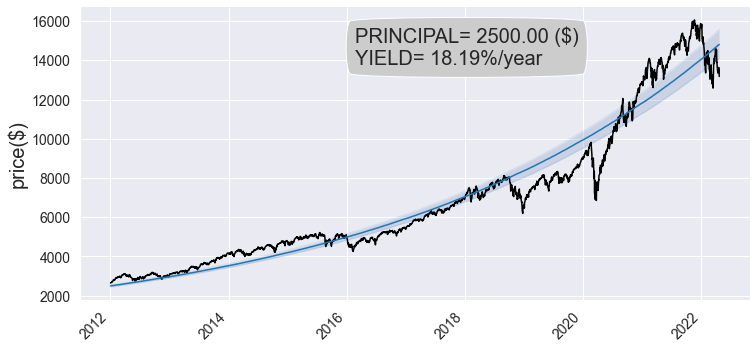

In [37]:
df = EFT_df
column_name =  'Adj Close'
nppy = 265
low_bounds = [2500,.05/nppy]
high_bounds = [2800, .35/nppy]
nstd = 3
peb(df, column_name, nppy, low_bounds, high_bounds, nstd)